# EDA ASSIGNMENT

#### Importing the libraries.

In [1]:
# Importing  required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Filter Warnings
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Reading the data from external source
inp0= pd.read_csv('application_data.csv')

In [4]:
# Displaying the first 5 rows for observing the application_data.
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Allowing compiler to show rows and columns upto 200 numbers per number of columns
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [6]:
# Observing the shape of the application_data. 
inp0.shape

(307511, 122)

In [7]:
# Checking the duplicated rows if any.
inp0.duplicated().sum()

0

In [8]:
# Check the column-wise info and null_count of the dataframe. (null count has been deprecated, using show_count instead)
inp0.info(verbose=True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

#### Eleminating the columns with null values more than 40%.

In [9]:
# Dropping the number of columns from application_data having missing value is greater than 40%.
cols_to_drop = list(inp0.columns[inp0.isnull().mean()*100>40])
inp0=inp0.drop(cols_to_drop, axis=1)
inp0.shape

(307511, 73)

In [10]:
# Remaining columns with null values in application_data.
inp0_null=inp0.columns[inp0.isnull().sum()>0]
inp0_null

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [11]:
inp0_cat = inp0.columns[inp0.dtypes=='object'].tolist()
inp0_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [12]:
inp0.AMT_ANNUITY.dtypes

dtype('float64')

Observation-

Since AMT_ANNUITY column is part of floating datatypes.Filling missing values with median value.

In [13]:
annu_med=inp0.AMT_ANNUITY.median()
annu_med

24903.0

In [14]:
inp0.AMT_ANNUITY.fillna(value= annu_med, inplace= True)

In [15]:
inp0.AMT_GOODS_PRICE.dtypes

dtype('float64')

Same follwed for AMT_GOODS_PRICE. Filling for median values.

In [16]:
gp_med=inp0.AMT_GOODS_PRICE.median()
gp_med

450000.0

In [17]:
inp0.AMT_GOODS_PRICE.fillna(value= annu_med, inplace= True)

Obseravtion-

Ignoring the 'NAME_TYPE_SUITE' column. opting for occupation type.

In [18]:
inp0.OCCUPATION_TYPE.value_counts(dropna= False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [19]:
#Checking 'NAME_INCOME_TYPE' value_counts where 'OCCUPATION_TYPE' has Null value. 
#Because both the column sharing the similar data.
inp0[inp0.OCCUPATION_TYPE.isnull()]['NAME_INCOME_TYPE'].value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [20]:
#checking 'OCCUPATION_TYPE' value_counts where 'NAME_INCOME_TYPE'  has value "Pensioner"

inp0[inp0.NAME_INCOME_TYPE=='Pensioner']['OCCUPATION_TYPE'].value_counts()

Cleaning staff    2
Laborers          1
Medicine staff    1
Sales staff       1
Name: OCCUPATION_TYPE, dtype: int64

Observation-
Upon careful observation, it has come to light that over 50% of the instances where the occupation data is missing pertain to individuals classified as pensioners. Given this notable trend, a viable course of action would be to disregard the 'occupation' column and instead rely on the 'Name_income_type' column for the purpose of analysis and decision-making.

In [21]:
#dropping both the column

In [22]:
list1= inp0[['OCCUPATION_TYPE', 'NAME_TYPE_SUITE']]
inp0=inp0.drop(list1, axis=1)
inp0.shape

(307511, 71)

In [23]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_

In [24]:
# dropping the less important column from consideration.
col=['REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [25]:
inp0.drop(col,axis=1,inplace=True)
inp0.shape

(307511, 17)

In [26]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'ORGANIZATION_TYPE'],
      dtype='object')

In [27]:
# checking the data types of remianing column.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307511 non-null  float64
 10  AMT_GOODS_PRICE      307511 non-null  float64
 11  NAME_INCOME_TYPE     307511 non-null  object 
 12  NAME_EDUCATION_TYPE  307511 non-null  object 
 13  NAME_FAMILY_STATUS   307511 non-null  object 
 14  NAME_HOUSING_TYPE    307511 non-null  object 
 15  DAYS_BIRTH       

observation- datatypes matching the column category.

In [28]:
# Checking column values.

In [29]:
col2= list[inp0.columns]
col2

list[Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'ORGANIZATION_TYPE'],
      dtype='object')]

In [30]:
for v in inp0.columns:
    print(inp0[v].value_counts())
    print('------------')

100002    1
337664    1
337661    1
337660    1
337659    1
         ..
218992    1
218991    1
218990    1
218989    1
456255    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
------------
0    282686
1     24825
Name: TARGET, dtype: int64
------------
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
------------
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
------------
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
------------
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
------------
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.

In [31]:
# replacing the gender value XNA with F value. Because majority values lies with Female gender.
inp0.loc[inp0.CODE_GENDER== "XNA",'CODE_GENDER']='F'
inp0['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [32]:
#dropping the value XNA from ORGANIZATION_TYPE
inp0= inp0.drop(inp0.loc[inp0['ORGANIZATION_TYPE']=='XNA'].index)

In [33]:
inp0.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

AMT_INCOME_TOTAL is continous numerical column. converting the column to ordered variable.

In [34]:
inp0['AMT_INCOME_TOTAL'].value_counts()

135000.0    30206
112500.0    25161
157500.0    22734
180000.0    21805
225000.0    18460
            ...  
117324.0        1
64584.0         1
142897.5        1
109170.0        1
440100.0        1
Name: AMT_INCOME_TOTAL, Length: 2266, dtype: int64

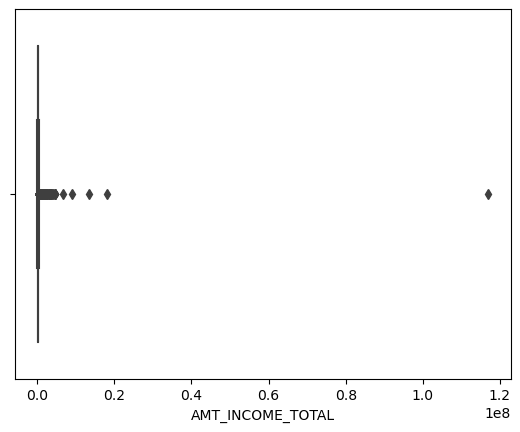

In [35]:
sns.boxplot(inp0['AMT_INCOME_TOTAL'])
plt.show()

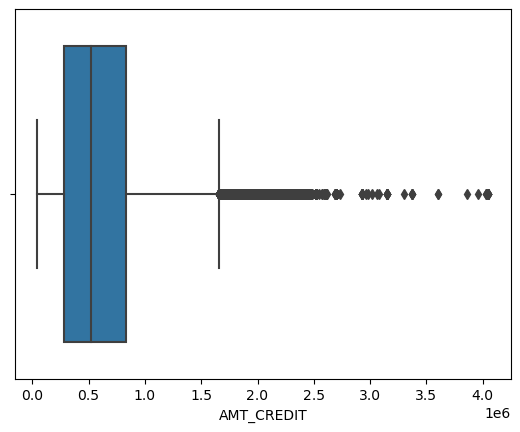

In [36]:
sns.boxplot(inp0['AMT_CREDIT'])
plt.show()

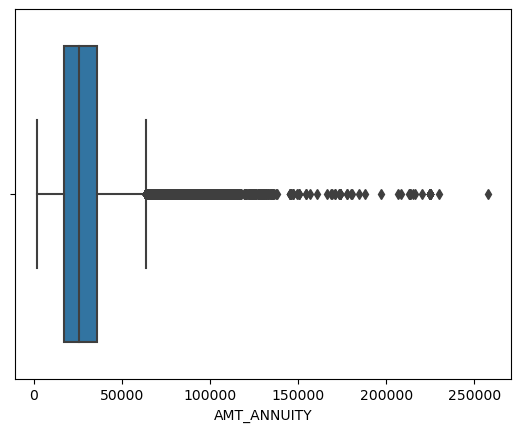

In [37]:
sns.boxplot(inp0['AMT_ANNUITY'])
plt.show()

observation-

Considering the presence of outliers in the 'income total,' 'credit amount,' and 'annuity amount' variables, it is advisable to employ a technique such as capping and flooring to achieve the desired variance in these values. By setting appropriate upper and lower thresholds, extreme values can be truncated, ensuring that the data remains within a reasonable range and allowing for more meaningful analysis and interpretation.

In [38]:
#Creating bins for continuous variable.
# for 'AMT_INCOME_TOTAL'
bins=[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,100000000]
variance = ['0-50000','50000-100000','100000-150000', '150000-200000',
       '200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']
inp0['AMT_INCOME_VAR']= pd.cut(inp0.AMT_INCOME_TOTAL, bins, labels=variance)

In [39]:
inp0['AMT_INCOME_VAR'].value_counts()

100000-150000       74670
150000-200000       55188
200000-250000       42477
50000-100000        41689
250000-300000       15234
300000-350000        8121
350000-400000        5317
400000-450000        4515
500000 and above     2542
0-50000              1982
450000-500000         401
Name: AMT_INCOME_VAR, dtype: int64

In [40]:
# Similar pattern follwed for AMT-CREDIT

In [41]:
inp0['AMT_CREDIT'].value_counts()

450000.0     8764
675000.0     7109
180000.0     6850
270000.0     6600
225000.0     6394
             ... 
1006888.5       1
1689736.5       1
296671.5        1
495486.0        1
743863.5        1
Name: AMT_CREDIT, Length: 5331, dtype: int64

In [42]:
print(inp0['AMT_CREDIT'].max(),inp0['AMT_CREDIT'].min())

4050000.0 45000.0


In [43]:
# for 'AMT_CREDIT'
bins=[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,100000000]
variance = ['0-50000','50000-100000','100000-150000', '150000-200000',
       '200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','500000-600000',
            '600000-650000', '650000-700000', '700000 and above']
inp0['AMT_CREDIT_VAR']= pd.cut(inp0.AMT_CREDIT, bins, labels=variance)

In [44]:
inp0['AMT_CREDIT_VAR'].value_counts()

700000 and above    96817
250000-300000       24961
500000-600000       18434
200000-250000       17502
400000-450000       15854
150000-200000       14867
300000-350000       13487
450000-500000       11254
600000-650000        9489
100000-150000        9234
350000-400000        8399
650000-700000        7571
50000-100000         3885
0-50000               383
Name: AMT_CREDIT_VAR, dtype: int64

In [45]:
inp0['AMT_ANNUITY'].value_counts()

9000.0     6047
13500.0    5131
6750.0     1962
10125.0    1675
37800.0    1383
           ... 
72549.0       1
97578.0       1
75712.5       1
5998.5        1
58770.0       1
Name: AMT_ANNUITY, Length: 13190, dtype: int64

In [46]:
inp0['AMT_ANNUITY'].nunique()

13190

In [47]:
print(inp0['AMT_ANNUITY'].max(),inp0['AMT_ANNUITY'].min(),inp0['AMT_ANNUITY'].median() )

258025.5 1980.0 25834.5


In [48]:
# for 'AMT_ANNUITY'
bins=[0,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,100000000]
variance = ['0-10000','10000-20000','20000-30000', '30000-40000',
       '40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-100000','110000-120000',
            '120000-130000', '140000-150000', '150000 and above']
inp0['AMT_ANNUITY_VAR']= pd.cut(inp0.AMT_ANNUITY, bins, labels=variance)

In [49]:
inp0['AMT_ANNUITY_VAR'].value_counts()

20000-30000         75645
10000-20000         63656
30000-40000         51014
40000-50000         24910
0-10000             18060
50000-60000         11681
60000-70000          4455
70000-80000          1383
80000-90000           542
90000-100000          361
110000-120000         157
120000-130000         112
150000 and above      103
140000-150000          58
Name: AMT_ANNUITY_VAR, dtype: int64

In [50]:
inp0.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-10020    41
-18248    41
-10292    40
          ..
-24617     1
-22311     1
-23473     1
-24763     1
-24319     1
Name: DAYS_BIRTH, Length: 16513, dtype: int64

In [51]:
inp0['AGE_YEARS'] = abs(inp0['DAYS_BIRTH']/365)

In [52]:
inp0['AGE_YEARS'].value_counts()

37.668493    43
36.934247    42
27.452055    41
49.994521    41
28.197260    40
             ..
67.443836     1
61.126027     1
64.309589     1
67.843836     1
66.627397     1
Name: AGE_YEARS, Length: 16513, dtype: int64

In [53]:
inp0['AGE_YEARS'].describe()

count    252137.000000
mean         40.463379
std          10.034449
min          20.517808
25%          32.260274
50%          39.926027
75%          48.117808
max          69.041096
Name: AGE_YEARS, dtype: float64

In [54]:
inp0['AGE_GROUP']= pd.cut(inp0.AGE_YEARS,bins=[15,25,35,45,55,65,75])

inp0['AGE_GROUP'].value_counts(normalize=True)

(35, 45]    0.330348
(25, 35]    0.285722
(45, 55]    0.256135
(55, 65]    0.076419
(15, 25]    0.048089
(65, 75]    0.003288
Name: AGE_GROUP, dtype: float64

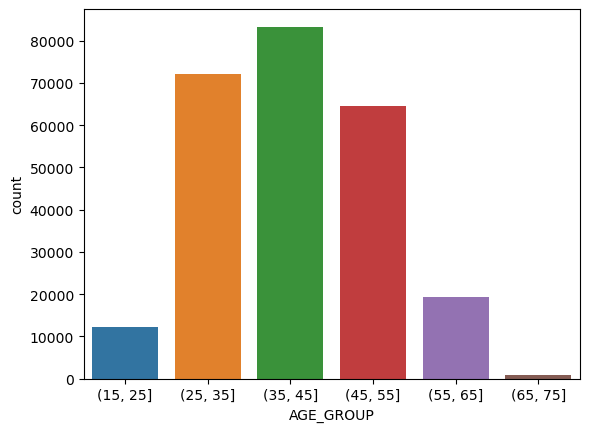

In [55]:
sns.countplot(data= inp0, x='AGE_GROUP')
plt.show()

Observation-
From the above graph, age group from 25 to 35 has most requirement.

### Checking data imbalnce through TARGET column

Per Column description, 

TARGET value 1 signifies the person having previous defaulters record.
                         
TARGET value 0 signifies the person not having previous defaulters record.

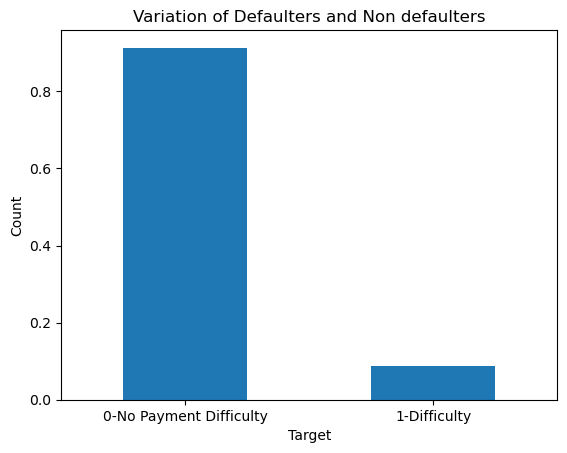

In [56]:
inp0.TARGET.value_counts(normalize= True).plot.bar()
plt.title('Variation of Defaulters and Non defaulters')
plt.xlabel('Target', fontsize= 10)
#listOf_Xticks =['No Payment Difficulty','Difficulty']
plt.xticks(ticks=[0,1], labels=['0-No Payment Difficulty', '1-Difficulty'], rotation = 0)
plt.ylabel('Count', fontsize= 10)
plt.show()

observation- Ratio of Target 0 to Target 1 says about the imbalance of data. Data gathered here reflects more no payment difficulty than facing difficulty. Let's see how many people have difficulty compare to non difficulty in payment.

In [57]:
round(inp0[inp0.TARGET==0].shape[0]/inp0[inp0.TARGET==1].shape[0],2)

10.55

The Imbalance ratio is 10.55

### Univariate Analysis

In [58]:
inp0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'ORGANIZATION_TYPE', 'AMT_INCOME_VAR', 'AMT_CREDIT_VAR',
       'AMT_ANNUITY_VAR', 'AGE_YEARS', 'AGE_GROUP'],
      dtype='object')

In [59]:
inp0_cat = inp0.columns[inp0.dtypes=='object'].tolist()
inp0_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE']

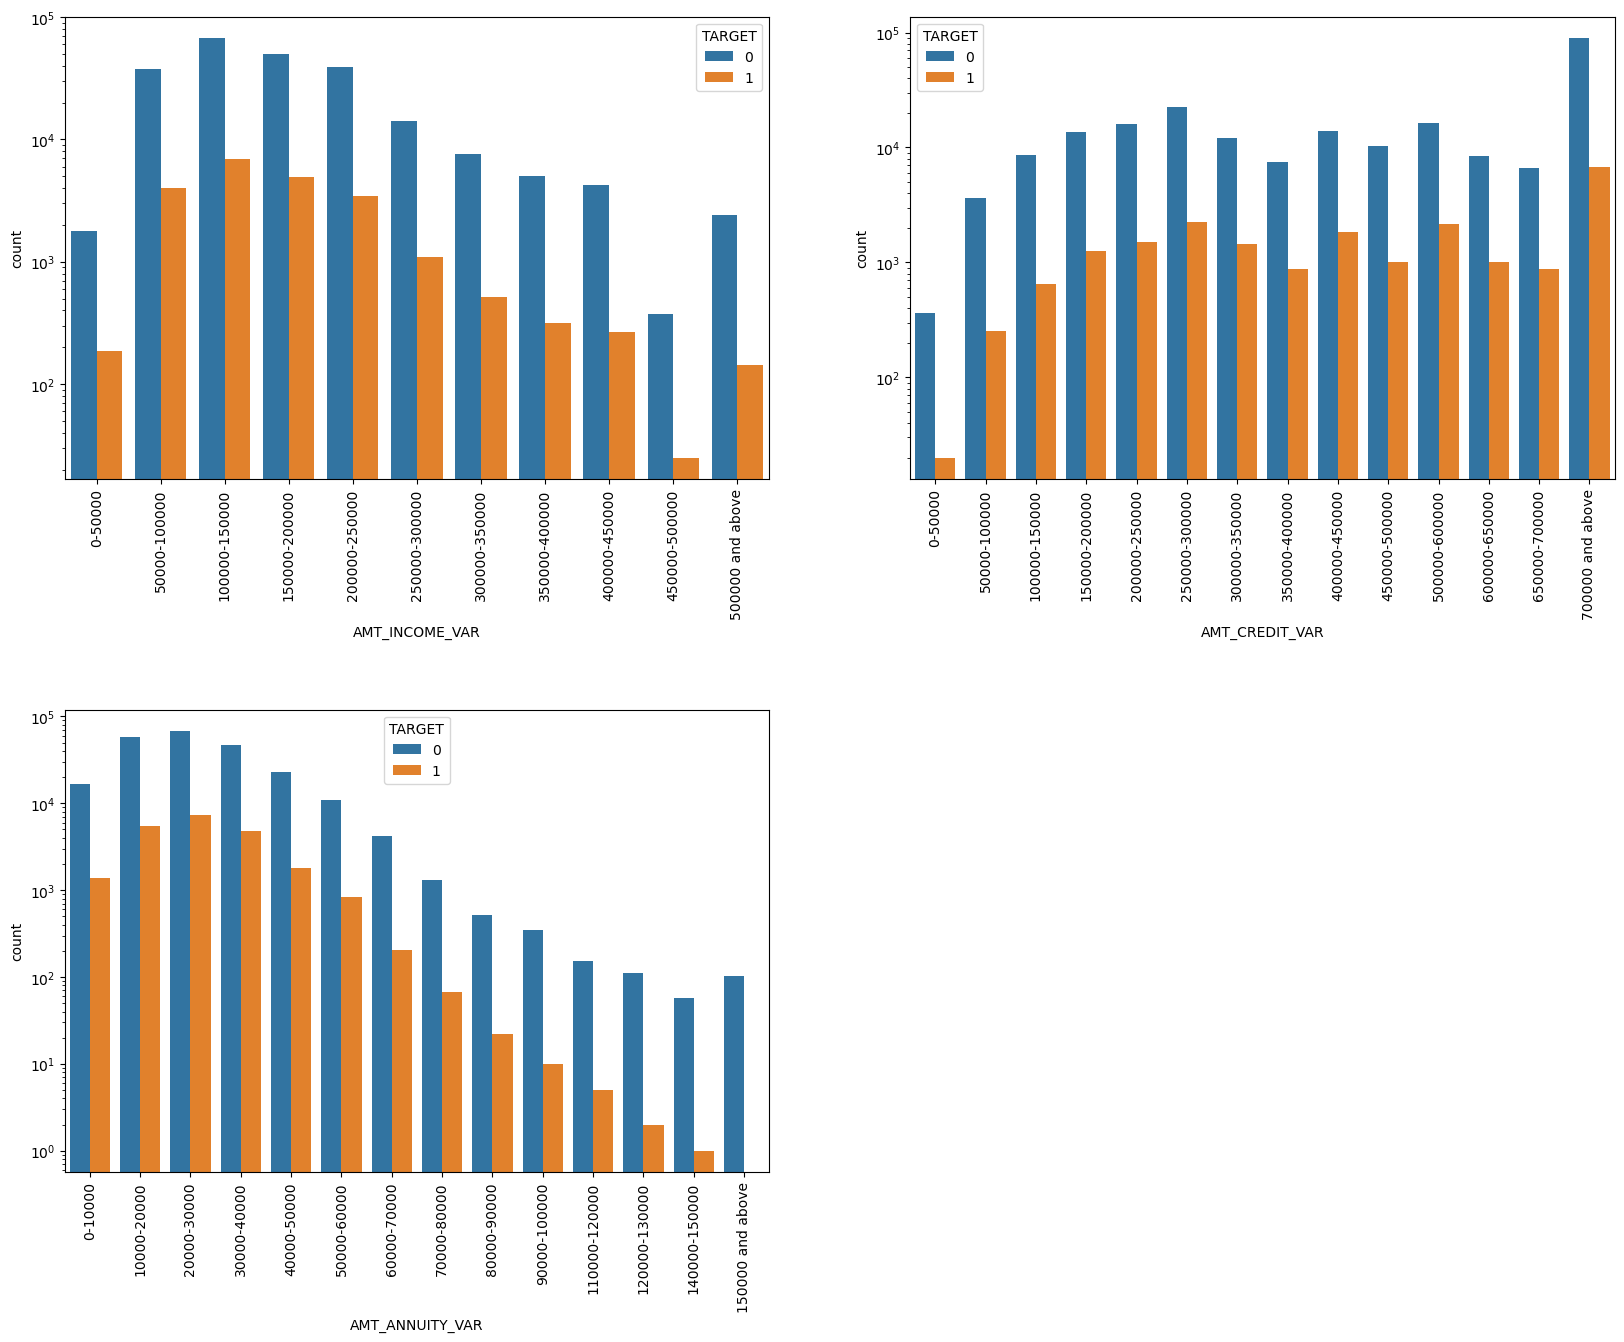

In [60]:
#for categorical ordered variable
cat_ord = ['AMT_INCOME_VAR','AMT_CREDIT_VAR', 'AMT_ANNUITY_VAR']
plt.figure(figsize = (20, 15))

for i in enumerate(cat_ord):
    plt.subplot(2, 2, i[0]+1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = i[1], hue = 'TARGET', data = inp0)
    plt.xticks(rotation = 90)
    plt.yscale('log')


observation-

a. Regarding the 'AMT_INCOME_VAR,' it is observed that customers with an annual income ranging from 1,00,000 to 2,00,000 exhibit a higher number of loans, along with a relatively high percentage of defaulters. However, this trend gradually diminishes as the annual income increases.

b. In relation to the 'AMT_CREDIT_VAR,' customers who acquire credit amounts around 50,000 display a significantly lower quantity of defaulters. However, there is a notable upsurge in the number of defaulters when the credit amount surpasses 50,000. Interestingly, there is a decline in the quantity of defaulters when the credit amount lies within the range of 3,00,000 to 4,00,000. Furthermore, a higher number of defaulters is observed for credit values exceeding 700,000.

c. As for the 'AMT_ANNUITY_VAR,' customers with an annual annuity amount ranging from 10,000 to 50,000 demonstrate both a higher quantity of loans and a correspondingly higher number of defaulters.

In [61]:
#for categorical unordered variable

In [62]:
cat_unord=['CODE_GENDER', 'NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']
cat_unord

['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_CONTRACT_TYPE']

In [63]:
tar_ndef=inp0.loc[inp0["TARGET"]==0]
tar_def=inp0.loc[inp0["TARGET"]==1]

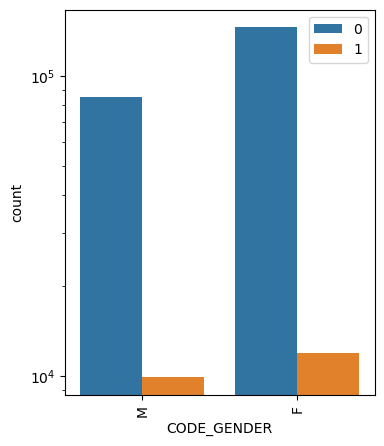

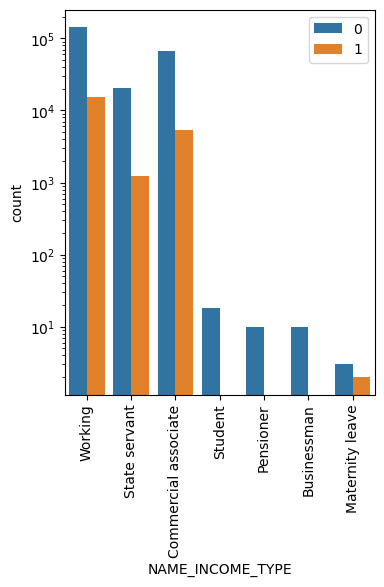

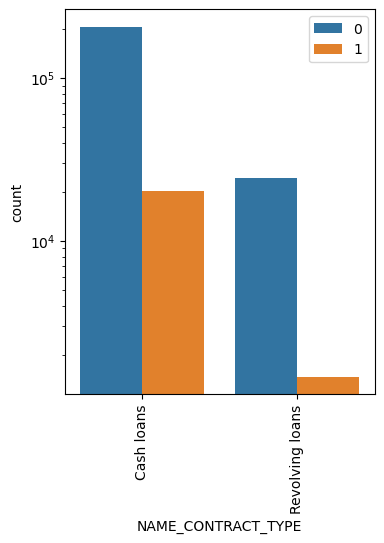

In [64]:
for i in cat_unord:
    plt.figure(figsize=[4,5])    
    sns.countplot(x = i, hue = 'TARGET', data = inp0)
    plt.xticks(rotation = 90)
    plt.yscale('log')
    plt.legend()
    plt.show()    

Observation-

a. Regarding the 'CODE_GENDER' variable, there is a higher quantity of female customers compared to male customers. Additionally, the distribution of loans is significantly higher among female applicants compared to their male counterparts.

b. When considering the 'NAME_INCOME_TYPE' variable, it is observed that students and businessmen exhibit a notably lower percentage of defaulters. On the other hand, working professionals, state servants, and commercial associates have a significantly higher default rate.

c. Analyzing the 'NAME_CONTRACT_TYPE' variable, it becomes evident that the frequency of credits for the 'Cash loans' contract type is higher than that of the 'Revolving loans' contract type. Furthermore, the 'Cash loans' category demonstrates a considerably higher number of defaulters compared to the 'Revolving loans' category.

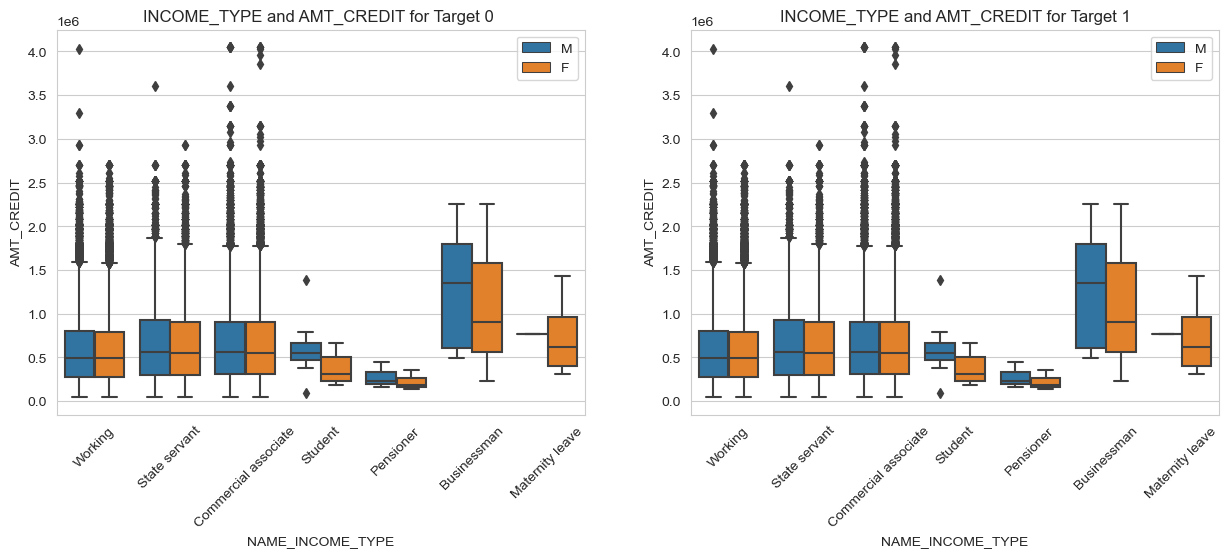

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.xticks(rotation=45)
plt.title("INCOME_TYPE and AMT_CREDIT for Target 0 ")
sns.boxplot(x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT',hue= 'CODE_GENDER', data =inp0 )
plt.legend()

sns.set_style('whitegrid')
plt.subplot(1,2,2)
plt.xticks(rotation=45)
plt.title("INCOME_TYPE and AMT_CREDIT for Target 1")
sns.boxplot(x = 'NAME_INCOME_TYPE', y = 'AMT_CREDIT', hue= 'CODE_GENDER', data = inp0 )
plt.legend()
plt.show()

Observation-

a. The plot clearly indicates that businessmen have the highest credit amounts compared to individuals in other professions, regardless of gender.

b. Commercial associates, working professionals, and state servants exhibit a greater number of outliers in terms of income, both among defaulters and non-defaulters, when compared to other income types.

c. Specifically, female businessmen tend to have a higher number of credits in the third quartile, suggesting that they obtain larger loan amounts compared to other female applicants in different professions.

#### Correlation matrix for Target 0 and Target 1

In [66]:
corr_0=tar_ndef.corr()
corr_0

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,AGE_YEARS
SK_ID_CURR,1.000000,NaN,-0.000484,0.001415,-0.000777,-0.001179,-0.000557,-0.001016,0.001016
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000484,NaN,1.000000,-0.009826,-0.018704,-0.007612,-0.022357,0.242462,-0.242462
AMT_INCOME_TOTAL,0.001415,NaN,-0.009826,1.000000,0.326155,0.400752,0.333392,-0.045543,0.045543
AMT_CREDIT,-0.000777,NaN,-0.018704,0.326155,1.000000,0.762103,0.986444,-0.152659,0.152659
AMT_ANNUITY,-0.001179,NaN,-0.007612,0.400752,0.762103,1.000000,0.766974,-0.091571,0.091571
AMT_GOODS_PRICE,-0.000557,NaN,-0.022357,0.333392,0.986444,0.766974,1.000000,-0.147169,0.147169
DAYS_BIRTH,-0.001016,NaN,0.242462,-0.045543,-0.152659,-0.091571,-0.147169,1.000000,-1.000000
AGE_YEARS,0.001016,NaN,-0.242462,0.045543,0.152659,0.091571,0.147169,-1.000000,1.000000


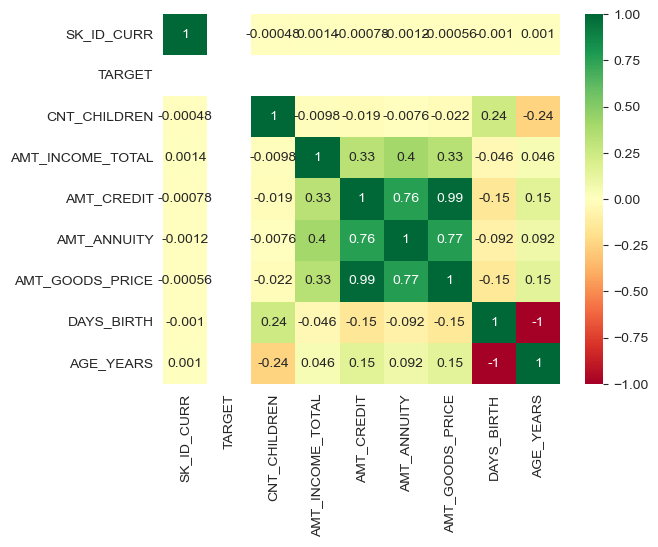

In [67]:
sns.heatmap(corr_0, annot= True, cmap= 'RdYlGn')
plt.show()

In [68]:
corr_1=tar_def.corr()
corr_1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,AGE_YEARS
SK_ID_CURR,1.000000,NaN,-0.006616,-0.011094,0.000820,-0.007284,0.000761,-0.005126,0.005126
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.006616,NaN,1.000000,0.001872,-0.002074,0.015653,-0.007716,0.176563,-0.176563
AMT_INCOME_TOTAL,-0.011094,NaN,0.001872,1.000000,0.036484,0.043358,0.036161,-0.007822,0.007822
AMT_CREDIT,0.000820,NaN,-0.002074,0.036484,1.000000,0.748708,0.982579,-0.189512,0.189512
AMT_ANNUITY,-0.007284,NaN,0.015653,0.043358,0.748708,1.000000,0.749591,-0.090497,0.090497
AMT_GOODS_PRICE,0.000761,NaN,-0.007716,0.036161,0.982579,0.749591,1.000000,-0.185106,0.185106
DAYS_BIRTH,-0.005126,NaN,0.176563,-0.007822,-0.189512,-0.090497,-0.185106,1.000000,-1.000000
AGE_YEARS,0.005126,NaN,-0.176563,0.007822,0.189512,0.090497,0.185106,-1.000000,1.000000


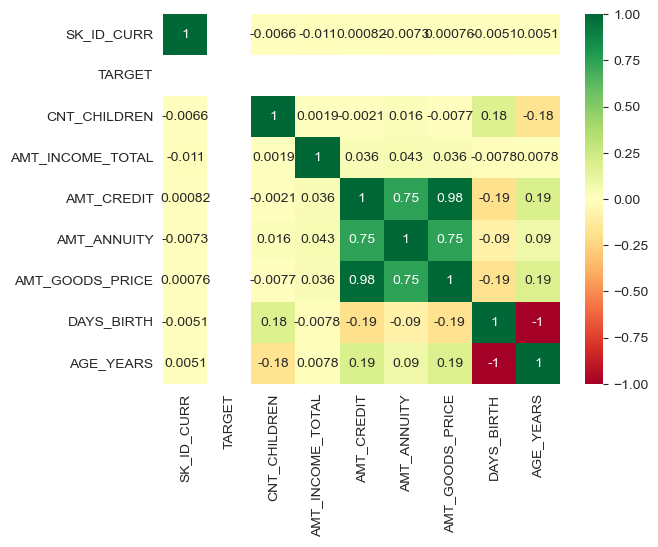

In [69]:
sns.heatmap(corr_1, annot= True, cmap= 'RdYlGn')
plt.show()

observation-


Based on the provided correlation table and heatmap, it is evident that there are several noteworthy correlations. Among them, the top three correlations are as follows:

Guarantor good price and credit amount: These two variables exhibit a strong positive correlation, indicating that as the guarantor's good price increases, the credit amount also tends to increase.

Credit amount and annuity amount: There exists a positive correlation between credit amount and annuity amount, suggesting that higher credit amounts are associated with larger annuity payments.

Guarantor good price and annuity amount: There is a correlation between the guarantor's good price and the annuity amount, although the strength of this correlation may be lower compared to the first two mentioned.

However, it is important to note that correlation does not imply causation, and further analysis is required to establish any causal relationships between these variables.


## Previous Application

In [70]:
inp1= pd.read_csv('previous_application.csv')

In [71]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
# Observing the shape of the application_data. 
inp1.shape

(1670214, 37)

In [73]:
# Checking the duplicated rows if any.
inp1.duplicated().sum()

0

In [74]:
# Check the column-wise info and null_count of the dataframe. (null count has been deprecated, using show_count instead)
inp1.info(verbose=True, show_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Data Cleaning

In [75]:
# Dropping the number of columns from application_data having missing value is greater than 40%.
cols_to_drop = list(inp1.columns[inp1.isnull().mean()*100>40])
cols_to_drop

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [76]:
# Dropping columns from application_data
inp1=inp1.drop(cols_to_drop, axis=1)
inp1.shape

(1670214, 26)

In [77]:
inp1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [78]:
inp1.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [79]:
inp1.AMT_ANNUITY.value_counts(dropna= False)

NaN          372235
2250.000      31865
11250.000     13974
6750.000      13442
9000.000      12496
              ...  
3794.445          1
8723.160          1
27948.330         1
25374.285         1
14704.290         1
Name: AMT_ANNUITY, Length: 357960, dtype: int64

In [80]:
med=inp1.AMT_ANNUITY.median()
med

11250.0

In [81]:
inp1.AMT_ANNUITY.fillna(value= med, inplace= True)
inp1.AMT_ANNUITY.value_counts(dropna= False)

11250.000    386209
2250.000      31865
6750.000      13442
9000.000      12496
22500.000     11903
              ...  
3794.445          1
8723.160          1
27948.330         1
25374.285         1
14704.290         1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [82]:
inp1.AMT_GOODS_PRICE.value_counts(dropna= False)

NaN          385515
45000.00      47831
225000.00     43549
135000.00     40666
450000.00     38926
              ...  
185292.00         1
225054.00         1
156212.55         1
99896.31          1
267295.50         1
Name: AMT_GOODS_PRICE, Length: 93886, dtype: int64

In [83]:
med2=inp1.AMT_GOODS_PRICE.median()
med2

112320.0

In [84]:
inp1.AMT_GOODS_PRICE.fillna(value= med2, inplace= True)
inp1.AMT_GOODS_PRICE.value_counts(dropna= False)

112320.00    385545
45000.00      47831
225000.00     43549
135000.00     40666
450000.00     38926
              ...  
185292.00         1
225054.00         1
156212.55         1
99896.31          1
267295.50         1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [85]:
inp1.CNT_PAYMENT.value_counts(dropna= False).head()

NaN     372230
12.0    323049
6.0     190461
0.0     144985
10.0    141851
Name: CNT_PAYMENT, dtype: int64

In [86]:
med3=inp1.CNT_PAYMENT.median()
med3

12.0

In [87]:
inp1.CNT_PAYMENT.fillna(value= med2, inplace= True)
inp1.CNT_PAYMENT.value_counts(dropna= False).head()

112320.0    372230
12.0        323049
6.0         190461
0.0         144985
10.0        141851
Name: CNT_PAYMENT, dtype: int64

In [88]:
inp1.NAME_CASH_LOAN_PURPOSE.value_counts(dropna= False)

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [89]:
inp1.NAME_CASH_LOAN_PURPOSE.mode()

0    XAP
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [90]:
# Replacing the value XNA and XAP with others category.
inp1.loc[inp1.NAME_CASH_LOAN_PURPOSE== "XNA",'NAME_CASH_LOAN_PURPOSE']='Other'
inp1['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 922661
Other                               693526
Repairs                              23765
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a third person                25
Refusal to 

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64


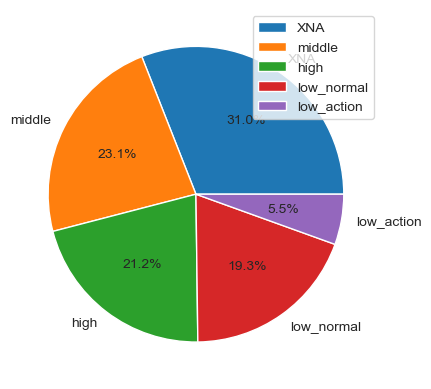

In [91]:
print(inp1.NAME_YIELD_GROUP.value_counts())

plt.pie(inp1.NAME_YIELD_GROUP.value_counts(normalize= True),labels=inp1.NAME_YIELD_GROUP.value_counts().index, autopct='%.1f%%')
plt.legend()
plt.show()

Observation-

Based on the given information, it is stated that the middle rate of interest for loans is the highest among other types. This suggests that, in the context being discussed, the middle rate of interest stands out as the most elevated compared to alternative interest rates associated with loans.

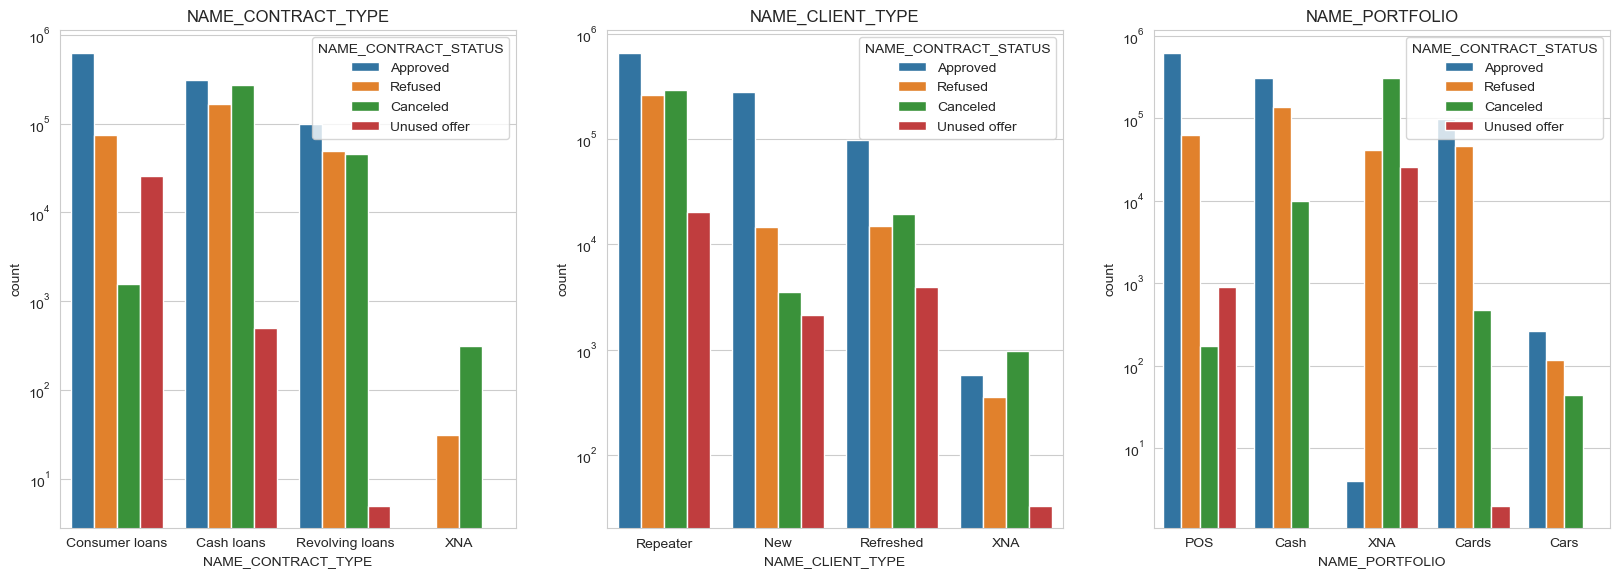

In [92]:
cate_col=['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO']


a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,22))

for i in cate_col:

    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    plt.yscale('log')
    sns.countplot(x=i, data=inp1, hue='NAME_CONTRACT_STATUS')
    c = c + 1

plt.show()

Observation-

a. It can be observed that consumer loans and cash loans are among the loan types with the highest approval rates. This implies that a significant number of applications for consumer loans and cash loans have been successfully approved.

b. On the other hand, there is a greater number of loan refusals recorded for cash loans compared to consumer loans. This suggests that cash loans have a higher likelihood of being declined when compared to consumer loans.

c. Based on the provided graph, it is evident that there is a higher count of repeated customers compared to new customers. This indicates that the number of customers who have availed loans in the past and are returning for additional loans is higher than the count of new customers.

d. Additionally, the number of loan refusals for cash loans exceeds the number of refusals for POS (Point of Sale) loans. This indicates that a larger proportion of cash loan applications have been declined compared to POS loan applications.

### Merging the two data set

In [93]:
comb0=pd.merge( inp0,inp1, how='inner', on="SK_ID_CURR", suffixes= '_x')
comb0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,ORGANIZATION_TYPE,AMT_INCOME_VAR,AMT_CREDIT_VAR,AMT_ANNUITY_VAR,AGE_YEARS,AGE_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,Business Entity Type 3,200000-250000,400000-450000,20000-30000,25.920548,"(25, 35]",1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,School,250000-300000,700000 and above,30000-40000,45.931507,"(45, 55]",1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,Other,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,School,250000-300000,700000 and above,30000-40000,45.931507,"(45, 55]",2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,-16765,School,250000-300000,700000 and above,30000-40000,45.931507,"(45, 55]",2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,Government,50000-100000,100000-150000,0-10000,52.180822,"(45, 55]",1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [94]:
comb0.shape

(1140118, 47)

In [95]:
comb0.duplicated().sum()

0

In [96]:
comb0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'ORGANIZATION_TYPE', 'AMT_INCOME_VAR', 'AMT_CREDIT_VAR',
       'AMT_ANNUITY_VAR', 'AGE_YEARS', 'AGE_GROUP', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPEx', 'AMT_ANNUITYx', 'AMT_APPLICATION', 'AMT_CREDITx',
       'AMT_GOODS_PRICEx', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', '

In [97]:
# dropping the unnecssary columns
col_to_drop = ['SK_ID_CURR','SK_ID_PREV','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
               'NFLAG_LAST_APPL_IN_DAY']
comb0.drop(col_to_drop , axis=1, inplace = True)
comb0.shape

(1140118, 41)

In [98]:
comb0.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_',
       'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'ORGANIZATION_TYPE', 'AMT_INCOME_VAR', 'AMT_CREDIT_VAR',
       'AMT_ANNUITY_VAR', 'AGE_YEARS', 'AGE_GROUP', 'NAME_CONTRACT_TYPEx',
       'AMT_ANNUITYx', 'AMT_APPLICATION', 'AMT_CREDITx', 'AMT_GOODS_PRICEx',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [99]:
comb0_cat=comb0.columns[comb0.dtypes=='object'].tolist()
comb0_cat

['NAME_CONTRACT_TYPE_',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPEx',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [100]:
comb0.NAME_CONTRACT_STATUS[comb0.TARGET.value_counts()]

1033783    Canceled
106335     Approved
Name: NAME_CONTRACT_STATUS, dtype: object

In [101]:
comb0.NAME_CONTRACT_STATUS.value_counts()

Approved        715931
Canceled        201765
Refused         201576
Unused offer     20846
Name: NAME_CONTRACT_STATUS, dtype: int64

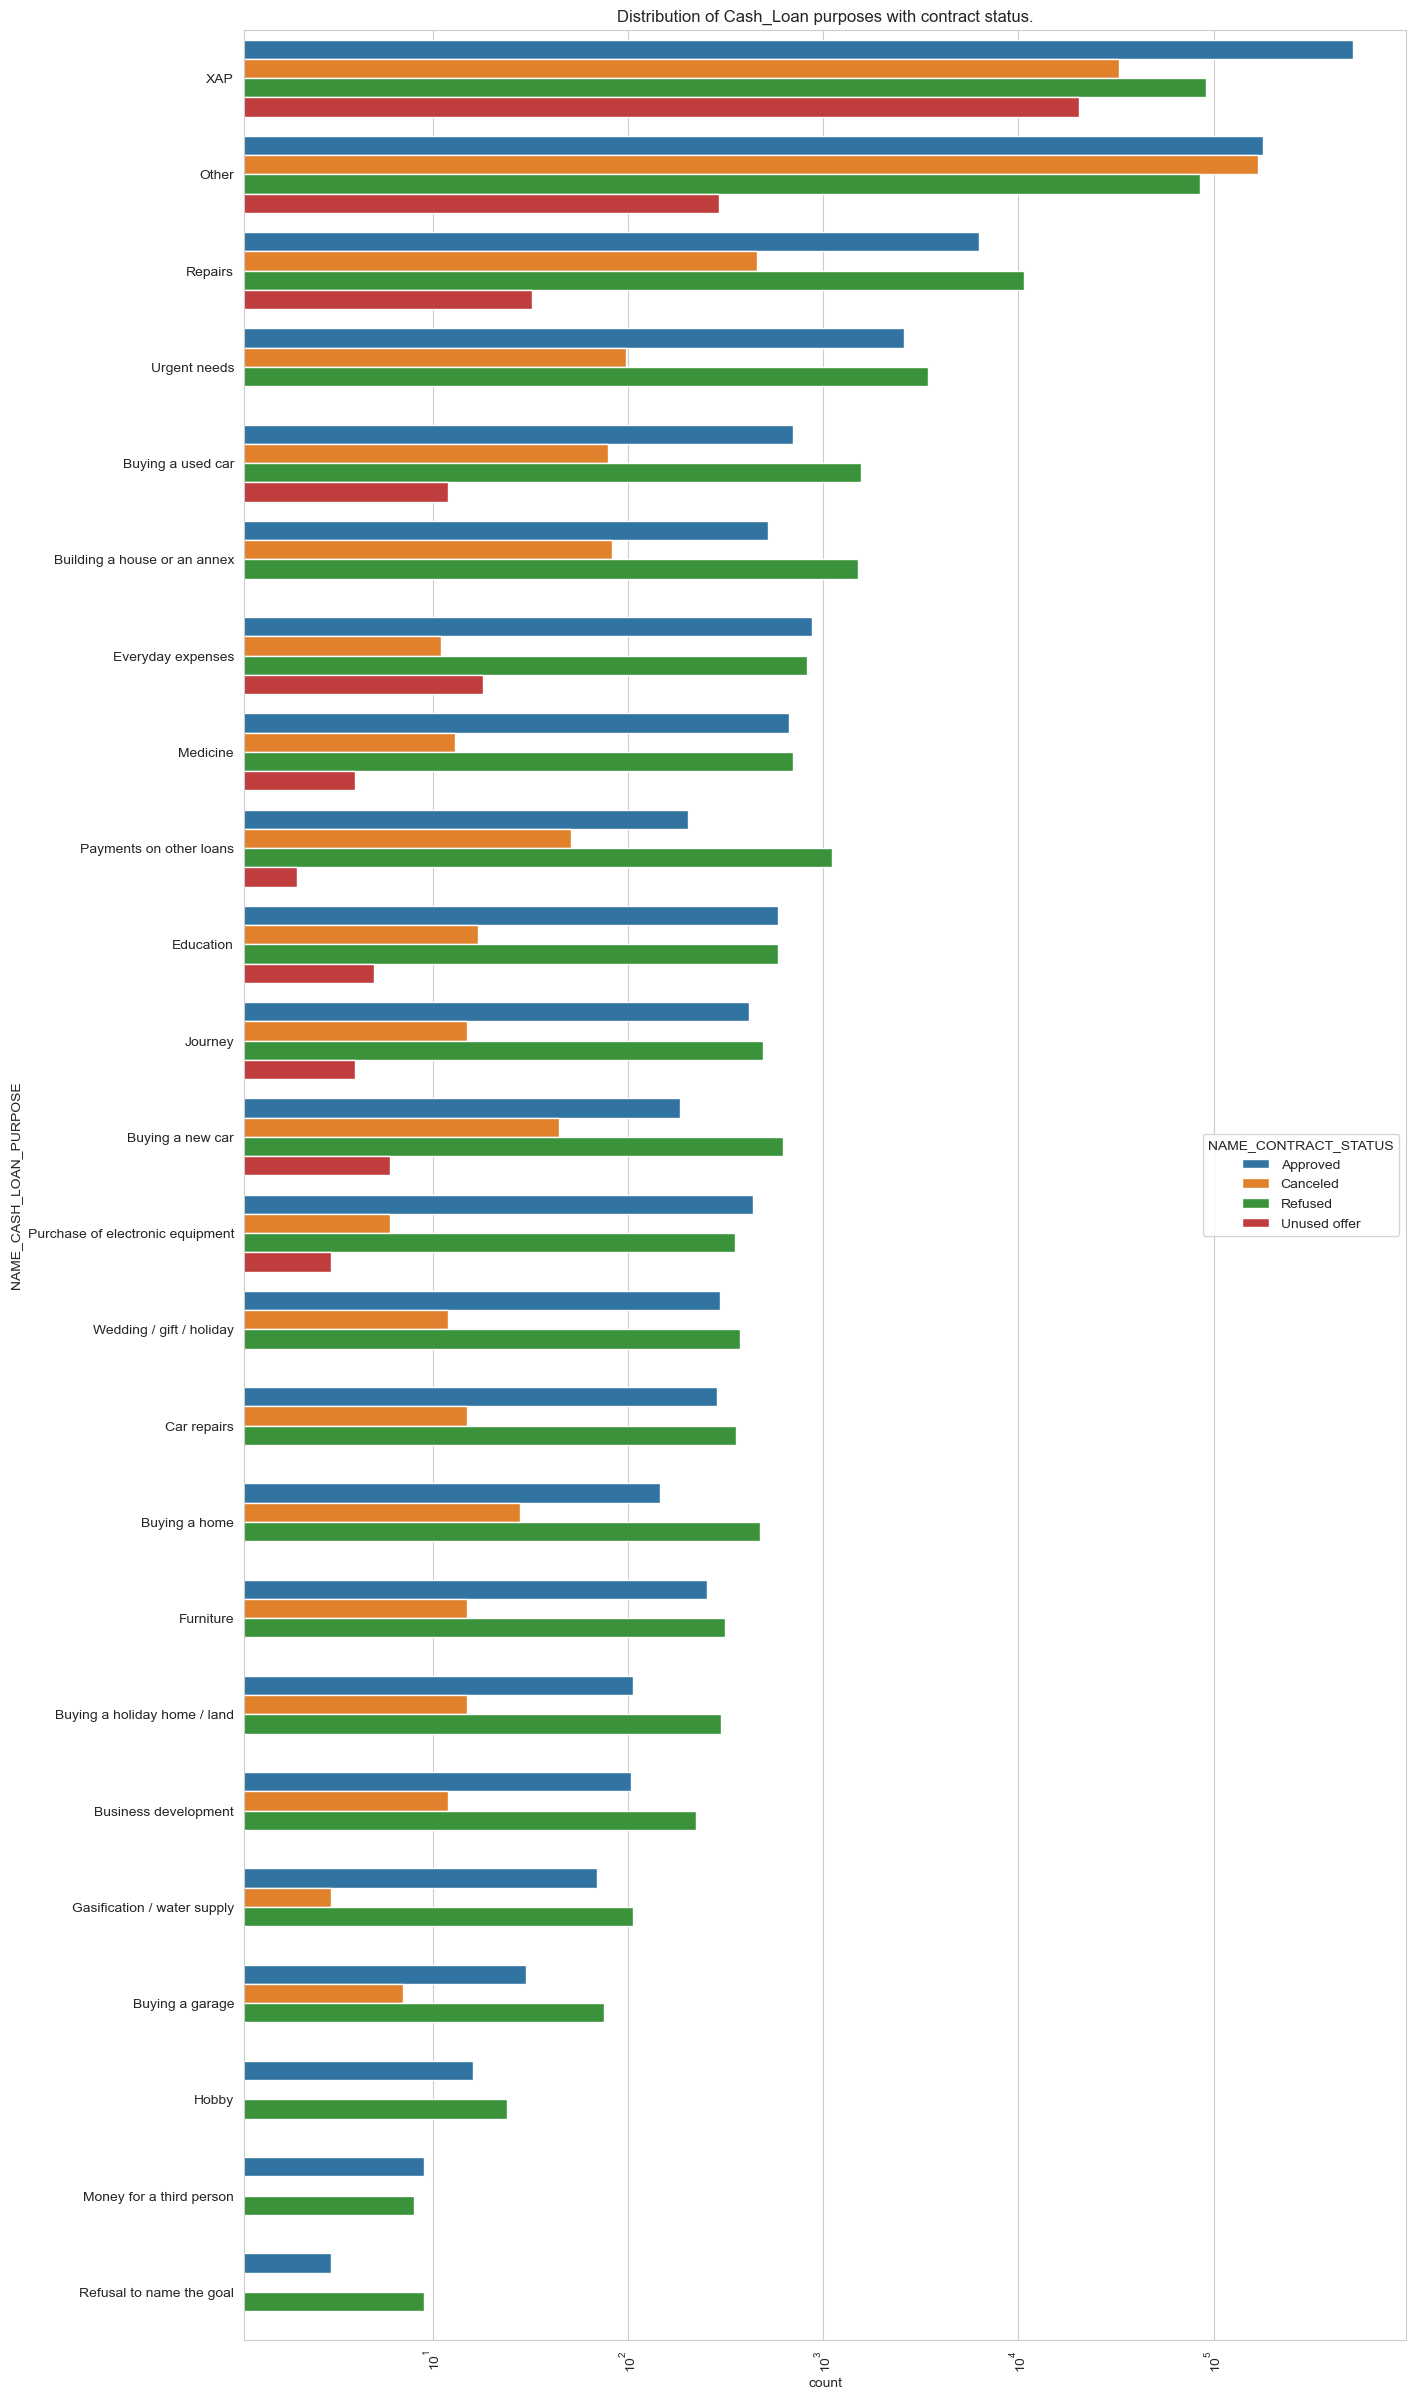

In [102]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Cash_Loan purposes with contract status.')
ax = sns.countplot(data = comb0, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=comb0['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 

Observation-

a. It is notable that a significant number of loan rejections are attributed to the purpose of "Repairs." This implies that loan applications with the purpose of "Repairs" have a higher likelihood of being declined compared to other purposes.

b. Conversely, loan applications with purposes such as "xap" and other miscellaneous categories exhibit a higher proportion of approved loans compared to refusals. This indicates that loans associated with these specific purposes are more likely to be approved by the lending institution.

c. Loan purposes such as "Hobby" and "Money for a third person" have a considerably lower incidence of cancellations. This suggests that loans intended for these purposes have a higher likelihood of being successfully disbursed and completed without being cancelled by either the borrower or the lender.

In [103]:
tar_ndef1=comb0.loc[comb0["TARGET"]==0]
tar_def1=comb0.loc[comb0["TARGET"]==1]

In [104]:
cash_loan= comb0.NAME_CASH_LOAN_PURPOSE.unique()
cash_loan

array(['XAP', 'Other', 'Payments on other loans', 'Buying a used car',
       'Repairs', 'Education', 'Buying a new car', 'Everyday expenses',
       'Urgent needs', 'Buying a holiday home / land', 'Medicine',
       'Car repairs', 'Building a house or an annex', 'Furniture',
       'Purchase of electronic equipment', 'Wedding / gift / holiday',
       'Buying a home', 'Journey', 'Business development',
       'Gasification / water supply', 'Buying a garage', 'Hobby',
       'Money for a third person', 'Refusal to name the goal'],
      dtype=object)

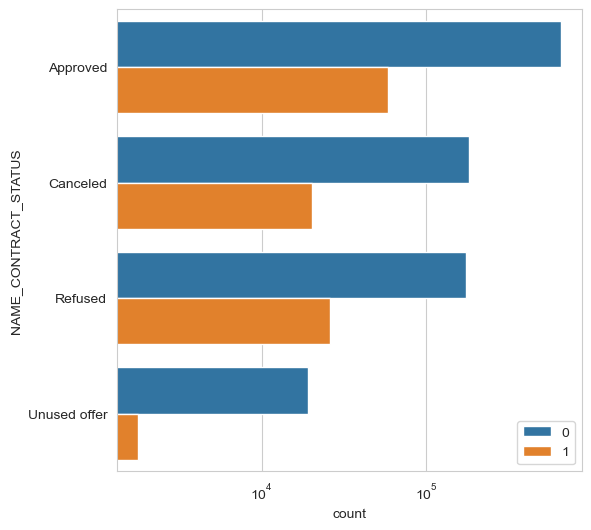

In [105]:
plt.figure(figsize=[6,6])
sns.countplot(data = comb0, y= 'NAME_CONTRACT_STATUS', 
               order=comb0['NAME_CONTRACT_STATUS'].value_counts().index,hue = 'TARGET') 
plt.xscale('log')
plt.legend()
plt.show()

In [106]:
# Number of Defaults in approved cases
Default_approved=comb0[(comb0['NAME_CONTRACT_STATUS']=="Approved") & (comb0['TARGET']==1)]
Default_approved.shape

(58297, 41)

Observations-

a. it is very strange refused and unused offer propsal does have defaulter percentage.

b. In previous approved loan customer does have also defaulter. it is major chunk.

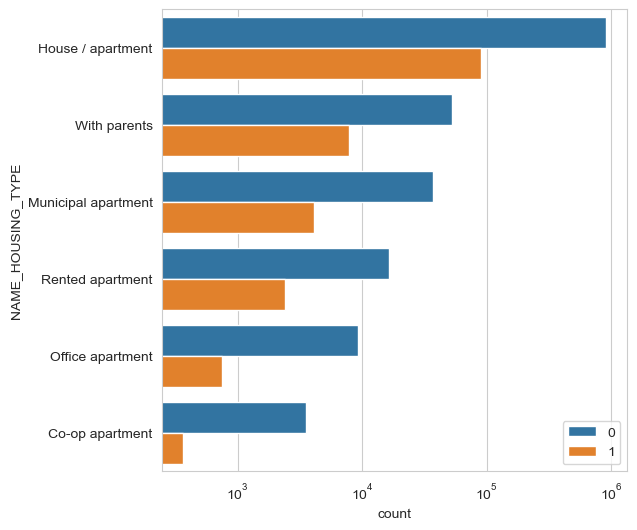

In [107]:
plt.figure(figsize=[6,6])
sns.countplot(data = comb0, y = 'NAME_HOUSING_TYPE', order=comb0['NAME_HOUSING_TYPE'].value_counts().index,hue = 'TARGET') 
plt.xscale('log')
plt.legend()
plt.show()

Observations-

It is evident that customers who reside in housing apartments or those who stay with their parents exhibit a higher proportion of non-defaulters. This suggests that individuals in these living arrangements have a lower likelihood of defaulting on their loans compared to customers with different housing situations.

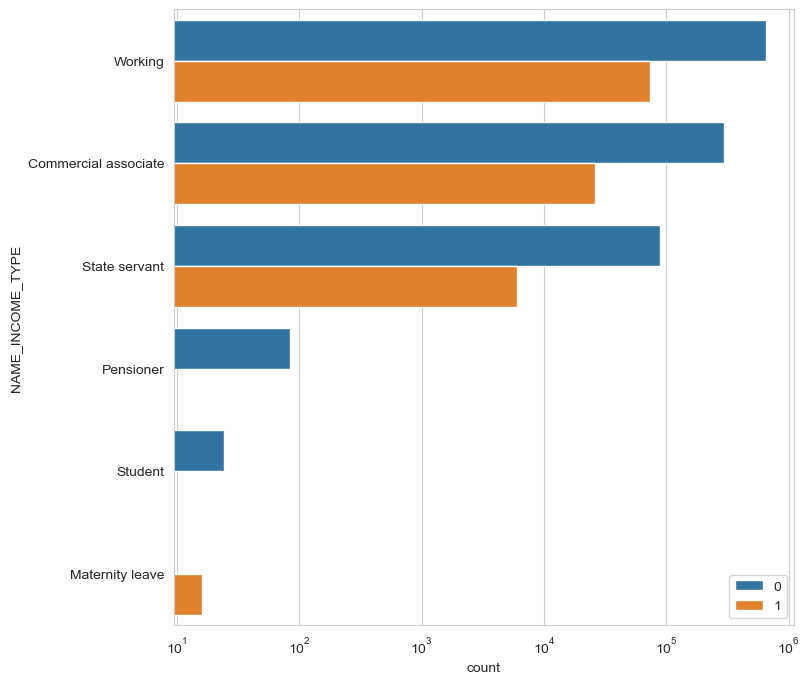

In [108]:
plt.figure(figsize=[8,8])
sns.countplot(data = comb0, y= 'NAME_INCOME_TYPE', 
               order=comb0['NAME_INCOME_TYPE'].value_counts().index,hue = 'TARGET') 
plt.xscale('log')
plt.legend()
plt.show()

observation-

a. Students and pensioners demonstrate a notably lower rate of defaulting on their loans. This indicates that individuals categorized as students or pensioners are less likely to default compared to other groups.

b. On the other hand, applicants who are on maternity leave show a higher incidence of defaulting on their loans. This suggests that individuals on maternity leave have a higher likelihood of encountering difficulties in meeting their loan obligations, leading to a higher default rate.

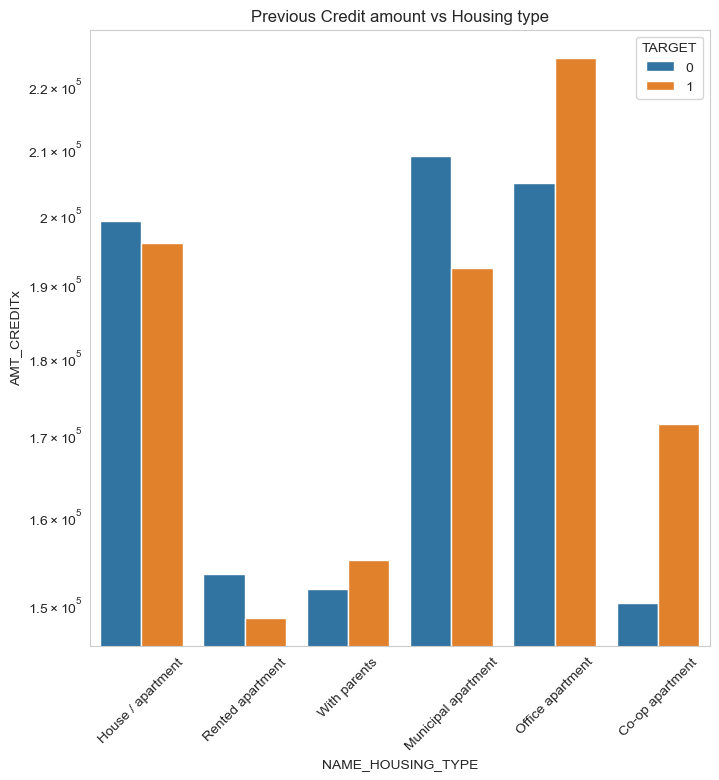

In [109]:
# Bar plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(8,8))
plt.xticks(rotation=45)
plt.yscale('log')
sns.barplot(data =comb0, y='AMT_CREDITx',hue='TARGET',x='NAME_HOUSING_TYPE', errwidth= 3 ,ci= None)
plt.title('Previous Credit amount vs Housing type')
plt.show()

observation-

a. Municipal and office apartments are associated with higher credit amounts for non-defaulters. This suggests that individuals residing in municipal and office apartments tend to have larger loan amounts when they have a good repayment history.

b. Among the different types of apartments, office apartments have the highest proportion of defaulters. This indicates that individuals living in office apartments are more likely to default on their loans compared to other types of apartments.

c. The default rate is significantly higher for co-op apartments compared to the non-defaulter rate. This implies that individuals residing in co-op apartments have a higher likelihood of defaulting on their loans.

d. Given the higher default rates observed for office apartments and co-op apartments, it is advisable for the bank to exercise caution and implement additional safety measures when granting loans to applicants from these categories.

e. To mitigate risks, the bank should prioritize its focus on house apartments and rented apartments. This suggests that individuals residing in these types of apartments are associated with lower default rates, making them potentially safer candidates for loan approvals.

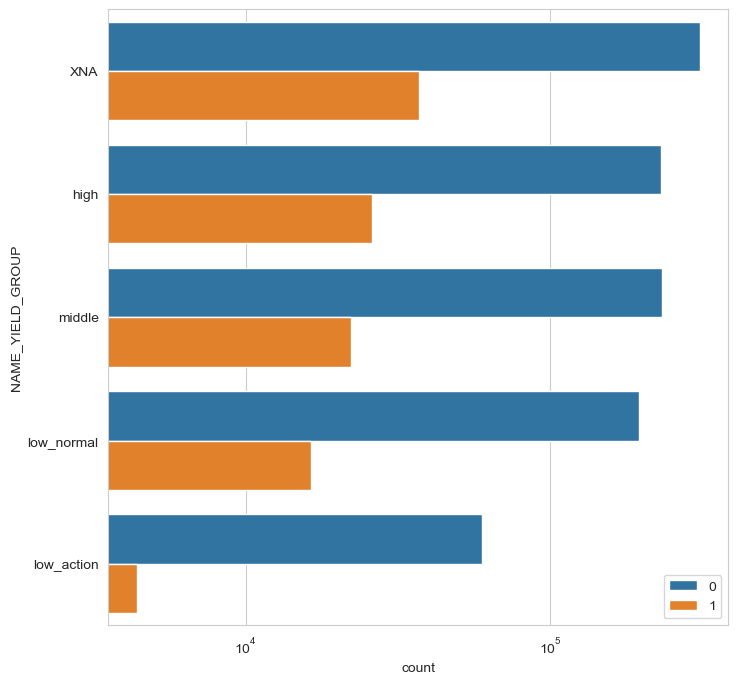

In [110]:
plt.figure(figsize=[8,8])
sns.countplot(data = comb0, y= 'NAME_YIELD_GROUP', 
               order=comb0['NAME_YIELD_GROUP'].value_counts().index,hue = 'TARGET') 
plt.xscale('log')
plt.legend()
plt.show()

Observation-

a. It appears that there is not a significant difference observed among non-defaulters across different interest rate groups. This implies that the interest rate does not have a substantial impact on the likelihood of default among non-defaulting borrowers.

b. However, there is a notable increase in the proportion of defaulters as the interest rate increases. This indicates that higher interest rates are associated with a higher risk of default, as borrowers may find it more challenging to meet their loan obligations when faced with higher interest charges.

### Correlation matrix

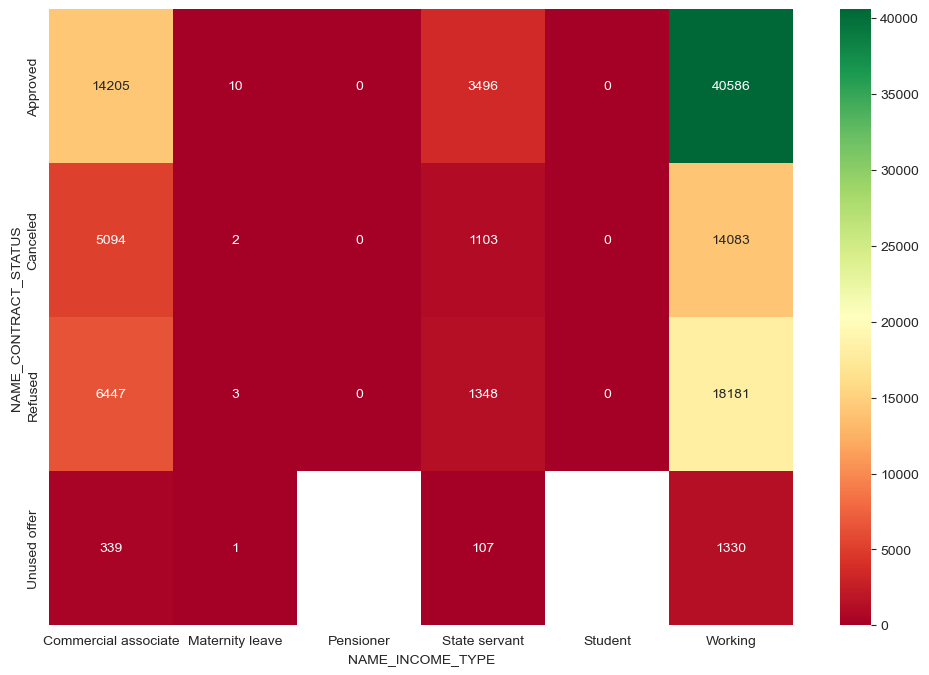

In [111]:
#Checking "NAME_CONTRACT_STATUS", "NAME_INCOME_STATUS",aggregating on Target

res=pd.pivot_table(data=comb0,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,8))
sns.heatmap(res, annot=True,cmap='RdYlGn', fmt="g")
plt.show()

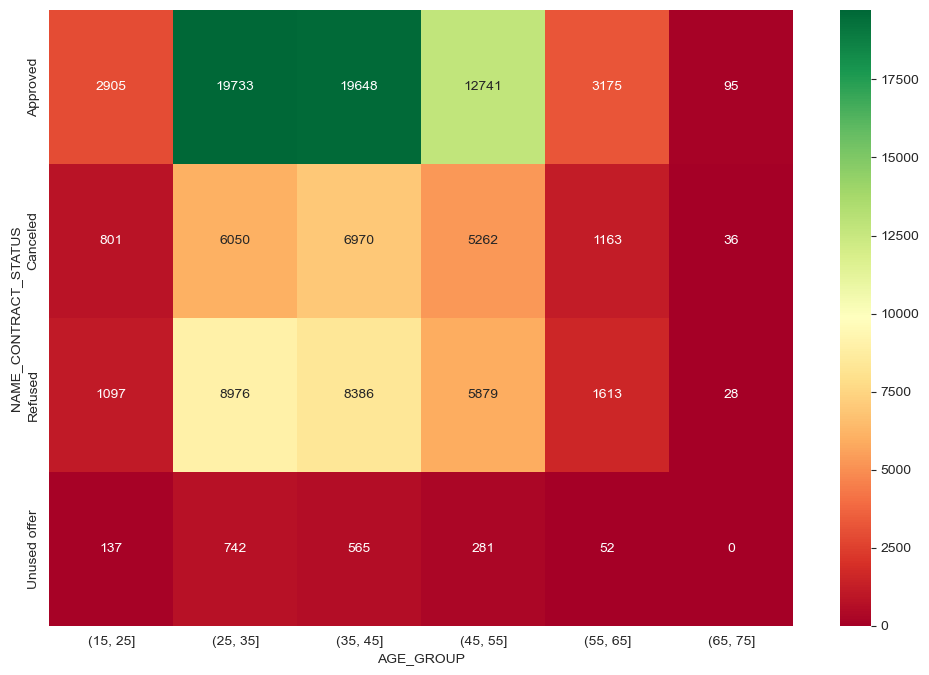

In [112]:
#Checking "NAME_CONTRACT_STATUS", "AGE_GROUP",aggregating on Target

res=pd.pivot_table(data=comb0,index="NAME_CONTRACT_STATUS",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,8))
sns.heatmap(res, annot=True,cmap='RdYlGn', fmt="g")
plt.show()

Observation-

a. The aforementioned matrix specifically pertains to instances where the TARGET variable is equal to 1, indicating cases of default.

b. Among working applicants with an approved status, a considerable number have defaulted on their loans. This suggests that even among those with an approved loan status, working applicants exhibit a higher propensity for default.

c. Previous loan applications that were either refused, cancelled, or left unused also exhibit instances of default. This indicates that the history of previous loan applications, regardless of their outcome, can be indicative of potential default risk.

d. It is observed that customers who were previously part of the working class and had their loan applications refused are now more likely to be among the defaulters.

e. Approved loans belonging to the age groups of 25-35 and 35-45 demonstrate a higher incidence of default. This implies that individuals within these age ranges, despite having their loans approved initially, have a greater tendency to default on their loan obligations.

### Case Summary

1. The loan amount is observed to be lower for unused applications, and it becomes imperative to ascertain the underlying cause for this phenomenon.
2. In view of the lower default rates associated with female applicants, it is advisable to accord them additional weightage during the evaluation process.
3. A significant proportion of defaulters comprises individuals who are employed. However, this fact should not automatically warrant the rejection of working applicants; instead, a comprehensive assessment of other pertinent parameters is necessary prior to proceeding with their loan applications.
4. In instances where a previous application exhibited refused or cancelled loans, it is essential to investigate the rationale behind the sanctioning of the current loan application with a defaulter option.
5. Notably, previous applications featuring instances of refused, cancelled, or unused loans also encompass cases belonging to the non-defaulter category, where timely payments are being made in the current application. This observation strongly suggests the possibility of erroneous decisions having been made in those particular cases.
5. Particular attention ought to be directed towards clients who reside in rented apartments or live with their parents, as these groups exhibit a markedly lower incidence of defaults compared to non-defaulters.
6. Based on the aforementioned analysis, it is evident that the number of repeated customers surpasses that of new customers, underscoring the need for increased focus on nurturing and retaining existing clientele.